#### import packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score

#### import data & preprocessing

In [2]:
# Load the dataset
file_path = r'E:\Natural Language Processing\2023-10 ~ 2024-7  ML on syntactic features for AD detection\features_郊游风景图.csv'
df = pd.read_csv(file_path)
df.head()

,No,date_subject,num_sentences,num_clauses,num_words,ratio_unique_words,ratio_repeats,mean_num_clauses_per_sentence,mean_num_t_units_per_sentence,mean_num_verb_phrases_per_t_unit,...,ratio_adj_mods,ratio_nom_mods,ratio_nom_subjs,ratio_cases,ratio_compounds,mean_dep_dis,mean_hier_dis,ratio_head_init_deps,ratio_head_final_deps,label
0,1,20230421KML,9,29,132,0.492424,0.204545,3.222222,2.000000,5.888889,...,0.000000,0.024390,0.146341,0.024390,0.008130,2.663158,2.126316,0.520325,0.552846,MCI
1,2,20230421LDX,11,14,90,0.588889,0.077778,1.272727,0.909091,2.800000,...,0.000000,0.025316,0.050633,0.025316,0.025316,2.000000,1.537037,0.658228,0.481013,CN
2,3,20230421XLM,24,46,231,0.354978,0.190476,1.916667,1.083333,3.115385,...,0.004831,0.043478,0.091787,0.048309,0.033816,2.042553,1.865248,0.473430,0.642512,CN
3,4,20230422CCL,12,30,129,0.341085,0.186047,2.500000,1.333333,3.562500,...,0.008547,0.025641,0.094017,0.008547,0.025641,2.100000,1.937500,0.564103,0.538462,AD
4,5,20230428FYD,17,40,227,0.370044,0.233480,2.352941,1.470588,3.320000,...,0.014286,0.085714,0.080952,0.038095,0.023810,2.512658,2.056962,0.423810,0.657143,CN


In [3]:
# Normalization
scaler = StandardScaler()
scaler.fit(df[list(df.columns)[2:-1]])
df[list(df.columns)[2:-1]] = scaler.transform(df[list(df.columns)[2:-1]])
df.head()

,No,date_subject,num_sentences,num_clauses,num_words,ratio_unique_words,ratio_repeats,mean_num_clauses_per_sentence,mean_num_t_units_per_sentence,mean_num_verb_phrases_per_t_unit,...,ratio_adj_mods,ratio_nom_mods,ratio_nom_subjs,ratio_cases,ratio_compounds,mean_dep_dis,mean_hier_dis,ratio_head_init_deps,ratio_head_final_deps,label
0,1,20230421KML,-0.131167,-0.057269,-0.234042,0.004176,-0.355520,-0.256746,-0.189132,-0.379651,...,-0.720085,-0.680269,1.056921,-0.709343,-0.773283,-0.276786,-0.231023,0.439595,-0.628138,MCI
1,2,20230421LDX,0.167772,-0.972328,-0.774018,0.843086,-1.730504,-0.844005,-0.752885,-0.854368,...,-0.720085,-0.638314,-1.667150,-0.668572,0.098952,-1.169021,-1.642936,2.190171,-1.978363,CN
2,3,20230421XLM,2.110875,0.979797,1.038759,-1.191129,-0.508123,-0.650027,-0.662841,-0.805898,...,-0.016428,0.184365,-0.495804,0.343538,0.530338,-1.111768,-0.856541,-0.155707,1.057301,CN
3,4,20230422CCL,0.317241,0.003735,-0.272612,-1.311951,-0.556169,-0.474305,-0.533648,-0.737183,...,0.524847,-0.623612,-0.432343,-1.406742,0.115424,-1.034477,-0.683426,0.995317,-0.898511,AD
4,5,20230428FYD,1.064589,0.613774,0.987332,-1.060110,-0.041680,-0.518605,-0.462718,-0.774451,...,1.360730,2.097539,-0.804193,-0.106067,0.022473,-0.479273,-0.397195,-0.785603,1.332312,CN


In [4]:
# Replace 'AD' and 'MCI' with 'CI'
df['label'] = df['label'].replace(['AD', 'MCI'], 'CI')
df.head()

,No,date_subject,num_sentences,num_clauses,num_words,ratio_unique_words,ratio_repeats,mean_num_clauses_per_sentence,mean_num_t_units_per_sentence,mean_num_verb_phrases_per_t_unit,...,ratio_adj_mods,ratio_nom_mods,ratio_nom_subjs,ratio_cases,ratio_compounds,mean_dep_dis,mean_hier_dis,ratio_head_init_deps,ratio_head_final_deps,label
0,1,20230421KML,-0.131167,-0.057269,-0.234042,0.004176,-0.355520,-0.256746,-0.189132,-0.379651,...,-0.720085,-0.680269,1.056921,-0.709343,-0.773283,-0.276786,-0.231023,0.439595,-0.628138,CI
1,2,20230421LDX,0.167772,-0.972328,-0.774018,0.843086,-1.730504,-0.844005,-0.752885,-0.854368,...,-0.720085,-0.638314,-1.667150,-0.668572,0.098952,-1.169021,-1.642936,2.190171,-1.978363,CN
2,3,20230421XLM,2.110875,0.979797,1.038759,-1.191129,-0.508123,-0.650027,-0.662841,-0.805898,...,-0.016428,0.184365,-0.495804,0.343538,0.530338,-1.111768,-0.856541,-0.155707,1.057301,CN
3,4,20230422CCL,0.317241,0.003735,-0.272612,-1.311951,-0.556169,-0.474305,-0.533648,-0.737183,...,0.524847,-0.623612,-0.432343,-1.406742,0.115424,-1.034477,-0.683426,0.995317,-0.898511,CI
4,5,20230428FYD,1.064589,0.613774,0.987332,-1.060110,-0.041680,-0.518605,-0.462718,-0.774451,...,1.360730,2.097539,-0.804193,-0.106067,0.022473,-0.479273,-0.397195,-0.785603,1.332312,CN


In [8]:
X = df.drop(['No', 'date_subject', 'label'], axis=1)
y = df['label']

#### identify and drop colinear features

In [9]:
corr_matrix = X.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
features_to_remove = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print("Number of features to be removed:", len(features_to_remove))
X_selected = X.drop(features_to_remove, axis=1)
print("Number of features preserved:", len(X_selected.keys()))
print("Features preserved:")
print(list(X_selected.keys()))

Number of features to be removed: 12
Number of features preserved: 16
Features preserved:
['num_sentences', 'ratio_repeats', 'mean_num_clauses_per_sentence', 'mean_num_clauses_per_t_unit', 'mean_length_clauses', 'prop_noun_phrase', 'prop_adj_phrase', 'prop_adv_phrase', 'prop_prep_phrase', 'ratio_adv_mods', 'ratio_adj_mods', 'ratio_nom_mods', 'ratio_nom_subjs', 'ratio_cases', 'ratio_compounds', 'ratio_head_init_deps']


#### train the classifiers with recursive feature elimination

In [ ]:
loo = LeaveOneOut()

def train_predict_loo(X, y, model):
    y_true = []
    y_pred = []
    prob = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
        prob.extend(1 - model.predict_proba(X_test)[:, 1])
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return model, y_true, y_pred, prob

def eval_model(y_true, y_pred, prob, pos_label, neg_label):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=pos_label)
    recall = recall_score(y_true, y_pred, pos_label=pos_label)
    cm = confusion_matrix(y_true, y_pred)
    auc = roc_auc_score(y_true == pos_label, prob)
    labels = [pos_label, neg_label]
    return accuracy, precision, recall, cm, auc, labels

In [21]:
n_features_to_select = 8

# Logistic Regression
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=n_features_to_select)
X_selected_selected = selector.fit_transform(X_selected, y)
selected_feature_indices = selector.get_support(indices=True)
selected_labels = [X_selected.keys()[i] for i in selected_feature_indices]
print("Logistic Regression:")
print(f'Features selected: {selected_labels}')
feature_importances = selector.estimator_.coef_
print(f'Feature importance: {feature_importances[0]}')
model, y_true, y_pred, prob = train_predict_loo(X_selected_selected, y, estimator)
accuracy, precision, recall, cm, auc, preds = eval_model(y_true, y_pred, prob, pos_label='CI', neg_label='CN')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1-score: {2/(1/precision + 1/recall):.2f}')
print(f'AUC: {auc:.2f}\n')

df_features = pd.DataFrame({
    'Feature': selected_labels,
    'Importance': feature_importances[0]
})
df_features['Importance'] = df_features['Importance'].map('{:.3f}'.format)
df_features.to_csv('feature_importances_LR.csv', index=False)

# Support Vector Machine
estimator = SVC(kernel='linear', probability=True)
selector = RFE(estimator, n_features_to_select=n_features_to_select)
X_selected_selected = selector.fit_transform(X_selected, y)
selected_feature_indices = selector.get_support(indices=True)
selected_labels = [X_selected.keys()[i] for i in selected_feature_indices]
print("Support Vector Machine:")
print(f'Features selected: {selected_labels}')
feature_importances = selector.estimator_.coef_
print(f'Feature importance: {feature_importances[0]}')
model, y_true, y_pred, prob = train_predict_loo(X_selected_selected, y, estimator)
accuracy, precision, recall, cm, auc, preds = eval_model(y_true, y_pred, prob, pos_label='CI', neg_label='CN')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1-score: {2/(1/precision + 1/recall):.2f}')
print(f'AUC: {auc:.2f}\n')

df_features = pd.DataFrame({
    'Feature': selected_labels,
    'Importance': feature_importances[0]
})
df_features['Importance'] = df_features['Importance'].map('{:.3f}'.format)
df_features.to_csv('feature_importances_SVM.csv', index=False)

# Linear Discriminant Analysis
estimator = LinearDiscriminantAnalysis()
selector = RFE(estimator, n_features_to_select=n_features_to_select)
X_selected_selected = selector.fit_transform(X_selected, y)
selected_feature_indices = selector.get_support(indices=True)
selected_labels = [X_selected.keys()[i] for i in selected_feature_indices]
print("Linear Discriminant Analysis:")
print(f'Features selected: {selected_labels}')
feature_importances = selector.estimator_.coef_
print(f'Feature importance: {feature_importances[0]}')
model, y_true, y_pred, prob = train_predict_loo(X_selected_selected, y, estimator)
accuracy, precision, recall, cm, auc, preds = eval_model(y_true, y_pred, prob, pos_label='CI', neg_label='CN')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1-score: {2/(1/precision + 1/recall):.2f}')
print(f'AUC: {auc:.2f}\n')

df_features = pd.DataFrame({
    'Feature': selected_labels,
    'Importance': feature_importances[0]
})
df_features['Importance'] = df_features['Importance'].map('{:.3f}'.format)
df_features.to_csv('feature_importances_LDA.csv', index=False)

Logistic Regression:
Features selected: ['num_sentences', 'mean_num_clauses_per_sentence', 'mean_length_clauses', 'prop_noun_phrase', 'prop_prep_phrase', 'ratio_adv_mods', 'ratio_nom_subjs', 'ratio_compounds']
Feature importance: [ 0.72391066  1.34864127  0.59536969  0.41750645 -1.16317285 -0.66892779
 -0.60856287  0.75763778]
Accuracy: 77.55%
Precision: 79.17%
Recall: 76.00%
F1-score: 0.78
AUC: 0.83

Support Vector Machine:
Features selected: ['num_sentences', 'ratio_repeats', 'mean_num_clauses_per_sentence', 'mean_length_clauses', 'prop_prep_phrase', 'ratio_adv_mods', 'ratio_nom_subjs', 'ratio_compounds']
Feature importance: [ 0.82731851  0.38381342  1.19714117  0.42429461 -1.01655339 -0.55474323
 -0.70245705  0.67512382]
Accuracy: 83.67%
Precision: 90.48%
Recall: 76.00%
F1-score: 0.83
AUC: 0.86

Linear Discriminant Analysis:
Features selected: ['num_sentences', 'mean_length_clauses', 'prop_adv_phrase', 'prop_prep_phrase', 'ratio_adv_mods', 'ratio_nom_subjs', 'ratio_compounds', 'rati

Support Vector Machine:
Features selected: ['num_sentences', 'ratio_repeats', 'mean_num_clauses_per_sentence', 'mean_length_clauses', 'prop_prep_phrase', 'ratio_adv_mods', 'ratio_nom_subjs', 'ratio_compounds']
Feature importance: [ 0.82731851  0.38381342  1.19714117  0.42429461 -1.01655339 -0.55474323
 -0.70245705  0.67512382]


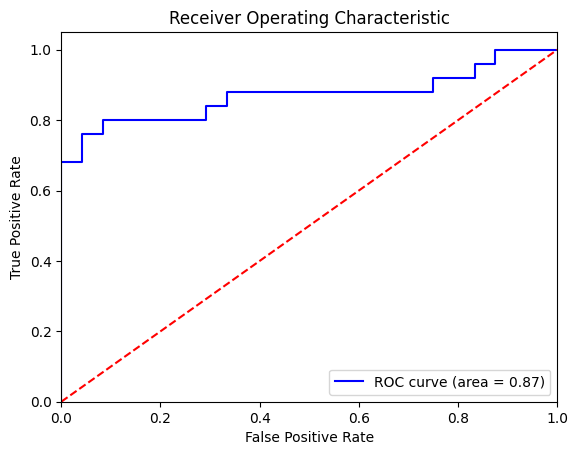

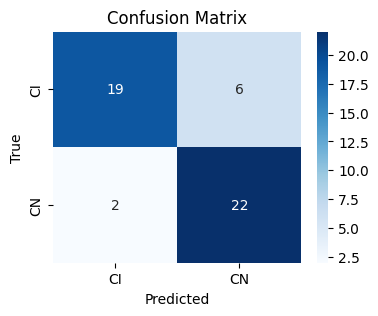

In [12]:
estimator = SVC(kernel='linear', probability=True)
selector = RFE(estimator, n_features_to_select=8)
X_selected_selected = selector.fit_transform(X_selected, y)
selected_feature_indices = selector.get_support(indices=True)
selected_labels = [X_selected.keys()[i] for i in selected_feature_indices]
print("Support Vector Machine:")
print(f'Features selected: {selected_labels}')
feature_importances = selector.estimator_.coef_
print(f'Feature importance: {feature_importances[0]}')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

loo = LeaveOneOut()

def train_predict_loo(X, y, model):
    y_true = []
    y_pred = []
    prob = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
        prob.extend(1 - model.predict_proba(X_test)[:, 1])
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return model, y_true, y_pred, prob

def eval_model(y_true, y_pred, prob, pos_label, neg_label):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=pos_label)
    recall = recall_score(y_true, y_pred, pos_label=pos_label)
    cm = confusion_matrix(y_true, y_pred)
    auc = roc_auc_score(y_true == pos_label, prob)
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true == pos_label, prob)
    labels = [pos_label, neg_label]
    return accuracy, precision, recall, cm, auc, fpr, tpr, thresholds, labels


# Assuming you have already called train_predict_loo() and eval_model()
model, y_true, y_pred, prob = train_predict_loo(X_selected_selected, y, estimator)
accuracy, precision, recall, cm, auc, fpr, tpr, thresholds, preds = eval_model(y_true, y_pred, prob, pos_label='CI', neg_label='CN')

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=preds, yticklabels=preds)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()